Get Datafile from CWD

In [1]:
#https://www.tensorflow.org/tutorials/keras/regression

import os
import pandas as pd

cwd = os.getcwd()

for file in os.listdir(cwd):
    if file.endswith('.csv'):
        print(file)
        filepath = cwd + '\\' + file
        dataset  = pd.read_csv(filepath,na_values='?')

Housing.csv


Review Dataset & Profile

In [2]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [3]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


In [5]:
import pandas_profiling
profile = dataset.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="pandas_profiling.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 167.12it/s]


In [6]:
#Render the pandas profile within vscode
#profile.to_notebook_iframe()

Determine Feature Types

![datatypes](yIS4o.png)

In [7]:
#https://realpython.com/python-data-types/

label_feature = 'price'
categorical_features = ['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea','furnishingstatus']

catg_data = dataset[categorical_features].copy()
cont_data = dataset.drop(categorical_features, axis=1)
all_cont_variables = cont_data.columns.tolist()
continious_features = [i for i in all_cont_variables if i not in label_feature]

model_features = dataset.columns.tolist()


Feature Summary Statistics

In [8]:
pd.options.display.float_format = '{:,.0f}'.format
summarytable = pd.DataFrame()

for feature in categorical_features:
    pivottable = dataset.pivot_table(index=dataset[feature], values=[label_feature], aggfunc={label_feature: ['count','mean','median']})
    pivottable = pivottable.droplevel(level=0, axis=1)
    pivottable = pivottable.reset_index()
    pivottable.rename(columns = {feature:'Group'}, inplace = True)
    pivottable.insert(loc=0,column='Feature',value=feature)
    summarytable = summarytable.append(pivottable)

In [9]:
#http://www.mash.dept.shef.ac.uk/Resources/MASH-WhatStatisticalTestHandout.pdf
summarytable=summarytable.reset_index()
summarytable = summarytable.drop(['index'], axis=1)
summarytable

,Feature,Group,count,mean,median
0,mainroad,no,77,"3,398,905","3,290,000"
1,mainroad,yes,468,"4,991,777","4,550,000"
2,guestroom,no,448,"4,544,546","4,165,000"
3,guestroom,yes,97,"5,792,897","5,495,000"
4,basement,no,354,"4,509,966","4,077,500"
5,basement,yes,191,"5,242,615","4,900,000"
6,hotwaterheating,no,520,"4,728,593","4,329,500"
7,hotwaterheating,yes,25,"5,559,960","5,383,000"
8,airconditioning,no,373,"4,191,940","3,885,000"
9,airconditioning,yes,172,"6,013,221","5,757,500"


In [10]:
#https://www.pythonfordatascience.org/independent-samples-t-test-python/

import researchpy as rp
import scipy.stats as stats


summary, results = rp.ttest(  group1= dataset[label_feature][dataset['mainroad'] == 'yes'], group1_name= "mainroad-yes",
                                        group2= dataset[label_feature][dataset['mainroad'] == 'no'], group2_name= "mainroad-no")

summary


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,mainroad-yes,468,"4,991,777","1,893,639","87,533","4,819,769","5,163,786"
1,mainroad-no,77,"3,398,905","894,735","101,965","3,195,825","3,601,985"
2,combined,545,"4,766,729","1,870,440","80,121","4,609,345","4,924,113"


In [11]:
pd.options.display.float_format = '{:,.4f}'.format
print(results)

                           Independent t-test        results
0  Difference (mainroad-yes - mainroad-no) =  1,592,872.7836
1                       Degrees of freedom =        543.0000
2                                        t =          7.2451
3                    Two side test p value =          0.0000
4                   Difference < 0 p value =          1.0000
5                   Difference > 0 p value =          0.0000
6                                Cohen's d =          0.8910
7                                Hedge's g =          0.8898
8                           Glass's delta1 =          0.8412
9                         Point-Biserial r =          0.2969


parking 0 0
price 0 1
area 1 0
bedrooms 1 1
bathrooms 2 0
stories 2 1


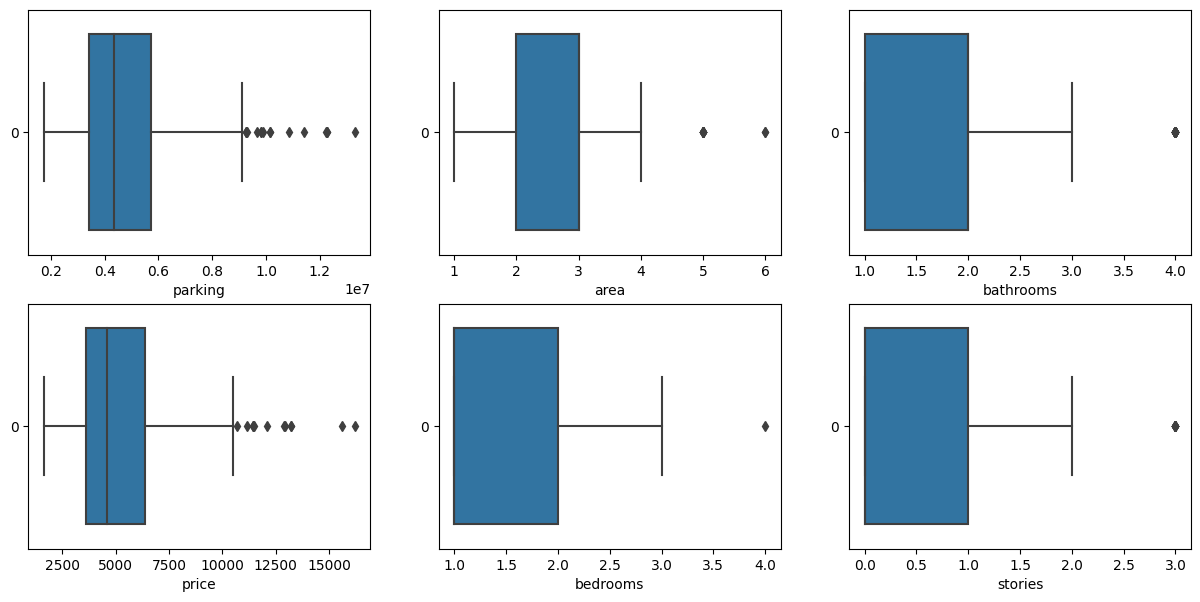

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#https://seaborn.pydata.org/generated/seaborn.boxplot.html

#https://www.kaggle.com/code/ashydv/housing-price-prediction-linear-regression

orient_h="h"
charts_wide = 3
charts_long = math.ceil(len(all_cont_variables)/charts_wide)
chart_count = len(all_cont_variables)

x =  np.arange(0,charts_wide,1)
y =  np.arange(0,charts_long,1)

fig, axs = plt.subplots(charts_long,charts_wide, figsize = (15,7))

i = 0

for a in x:
    for b in y:
        print(all_cont_variables[i-1],x[a],y[b])
        box_plot = sns.boxplot(dataset[all_cont_variables[i]], ax = axs[y[b],x[a]], orient=orient_h)
        box_plot.set(xlabel = all_cont_variables[i-1])
        i = i+1



parking 0 0
price 0 1
area 1 0
bedrooms 1 1
bathrooms 2 0
stories 2 1


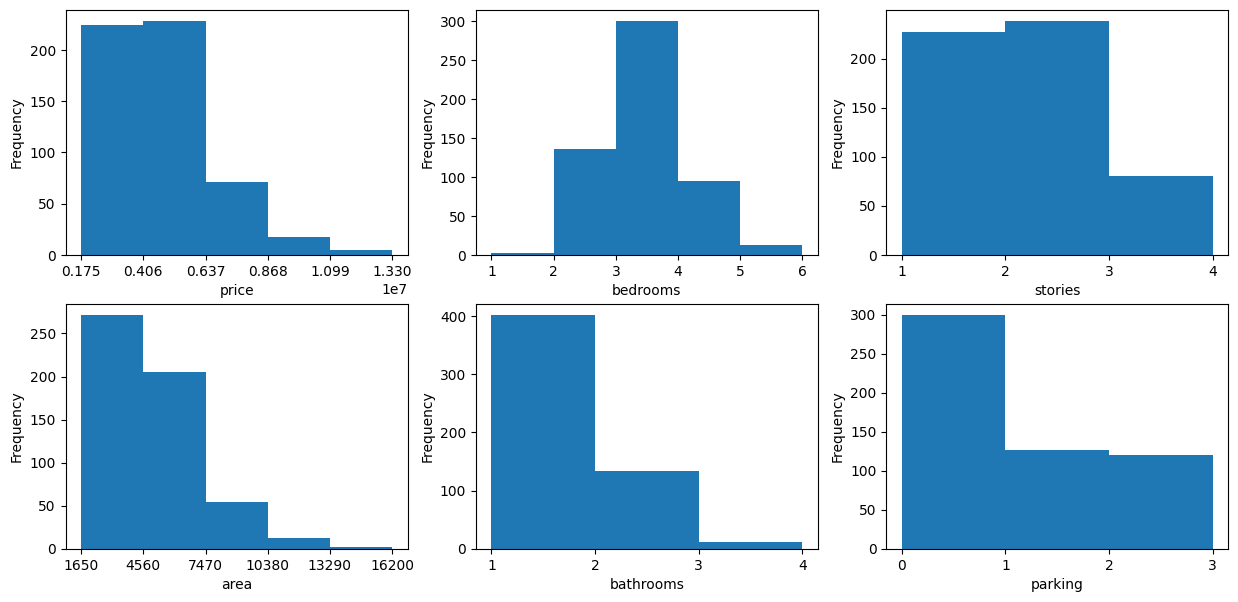

In [13]:
orient_h="h"
charts_wide = 3
charts_long = math.ceil(len(all_cont_variables)/charts_wide)
chart_count = len(all_cont_variables)

x =  np.arange(0,charts_wide,1)
y =  np.arange(0,charts_long,1)

fig, axs = plt.subplots(charts_long,charts_wide, figsize = (15,7))

i = 0

for a in x:
    for b in y:
        print(all_cont_variables[i-1],x[a],y[b])
        ax = axs[y[b]][x[a]]
        bins = min(5,max(dataset[all_cont_variables[i]])-min(dataset[all_cont_variables[i]]))
        box_plot, edges, more = ax.hist(dataset[all_cont_variables[i]], bins=bins)# weights=counts)
        ax.set_xlabel(all_cont_variables[i])
        ax.set_ylabel("Frequency")
        ax.set_xticks(edges)
        i = i+1

IndexError: list index out of range

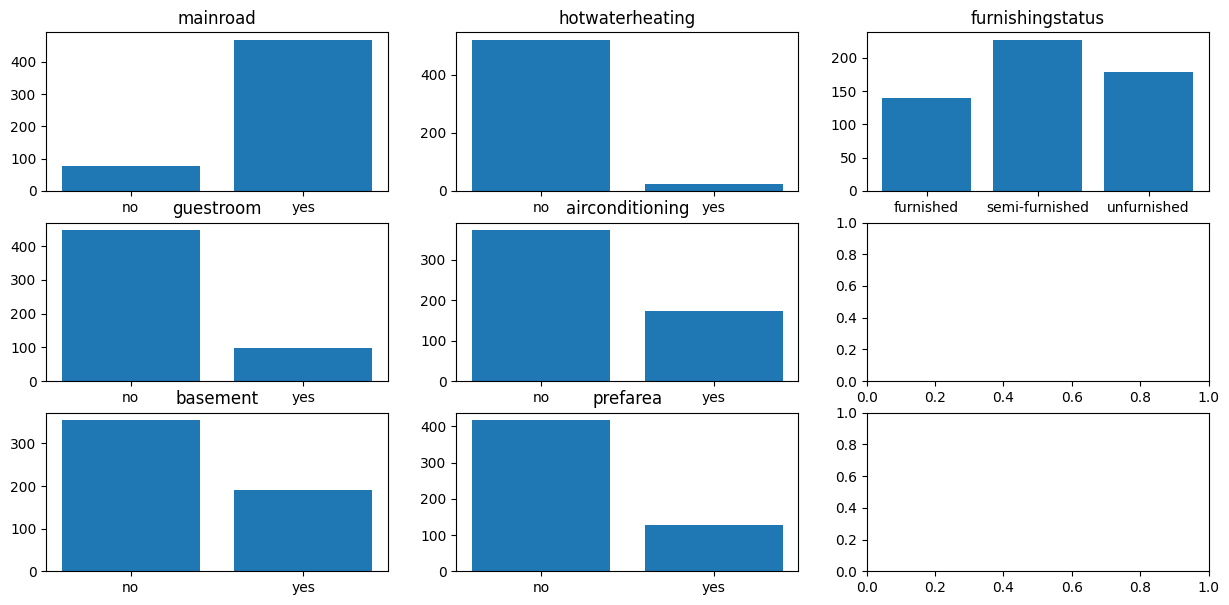

In [14]:
orient_h="h"
charts_wide = 3
charts_long = math.ceil(len(categorical_features)/charts_wide)
chart_count = len(all_cont_variables)

x =  np.arange(0,charts_wide,1)
y =  np.arange(0,charts_long,1)

fig, axs = plt.subplots(charts_long,charts_wide, figsize = (15,7))

i = 0

for a in x:
    for b in y:
        feature = categorical_features[i]
       # print(feature[i],x[a],y[b])
        groups = catg_data.groupby([feature])[feature].count()
        #ax = axs[y[b]][x[a]]
        ax = axs[y[b]][x[a]]

        ax.bar(groups.index.tolist(), groups)
        ax.set_title(feature)
        #ax.bar(test, color ='maroon')
        i = i+1

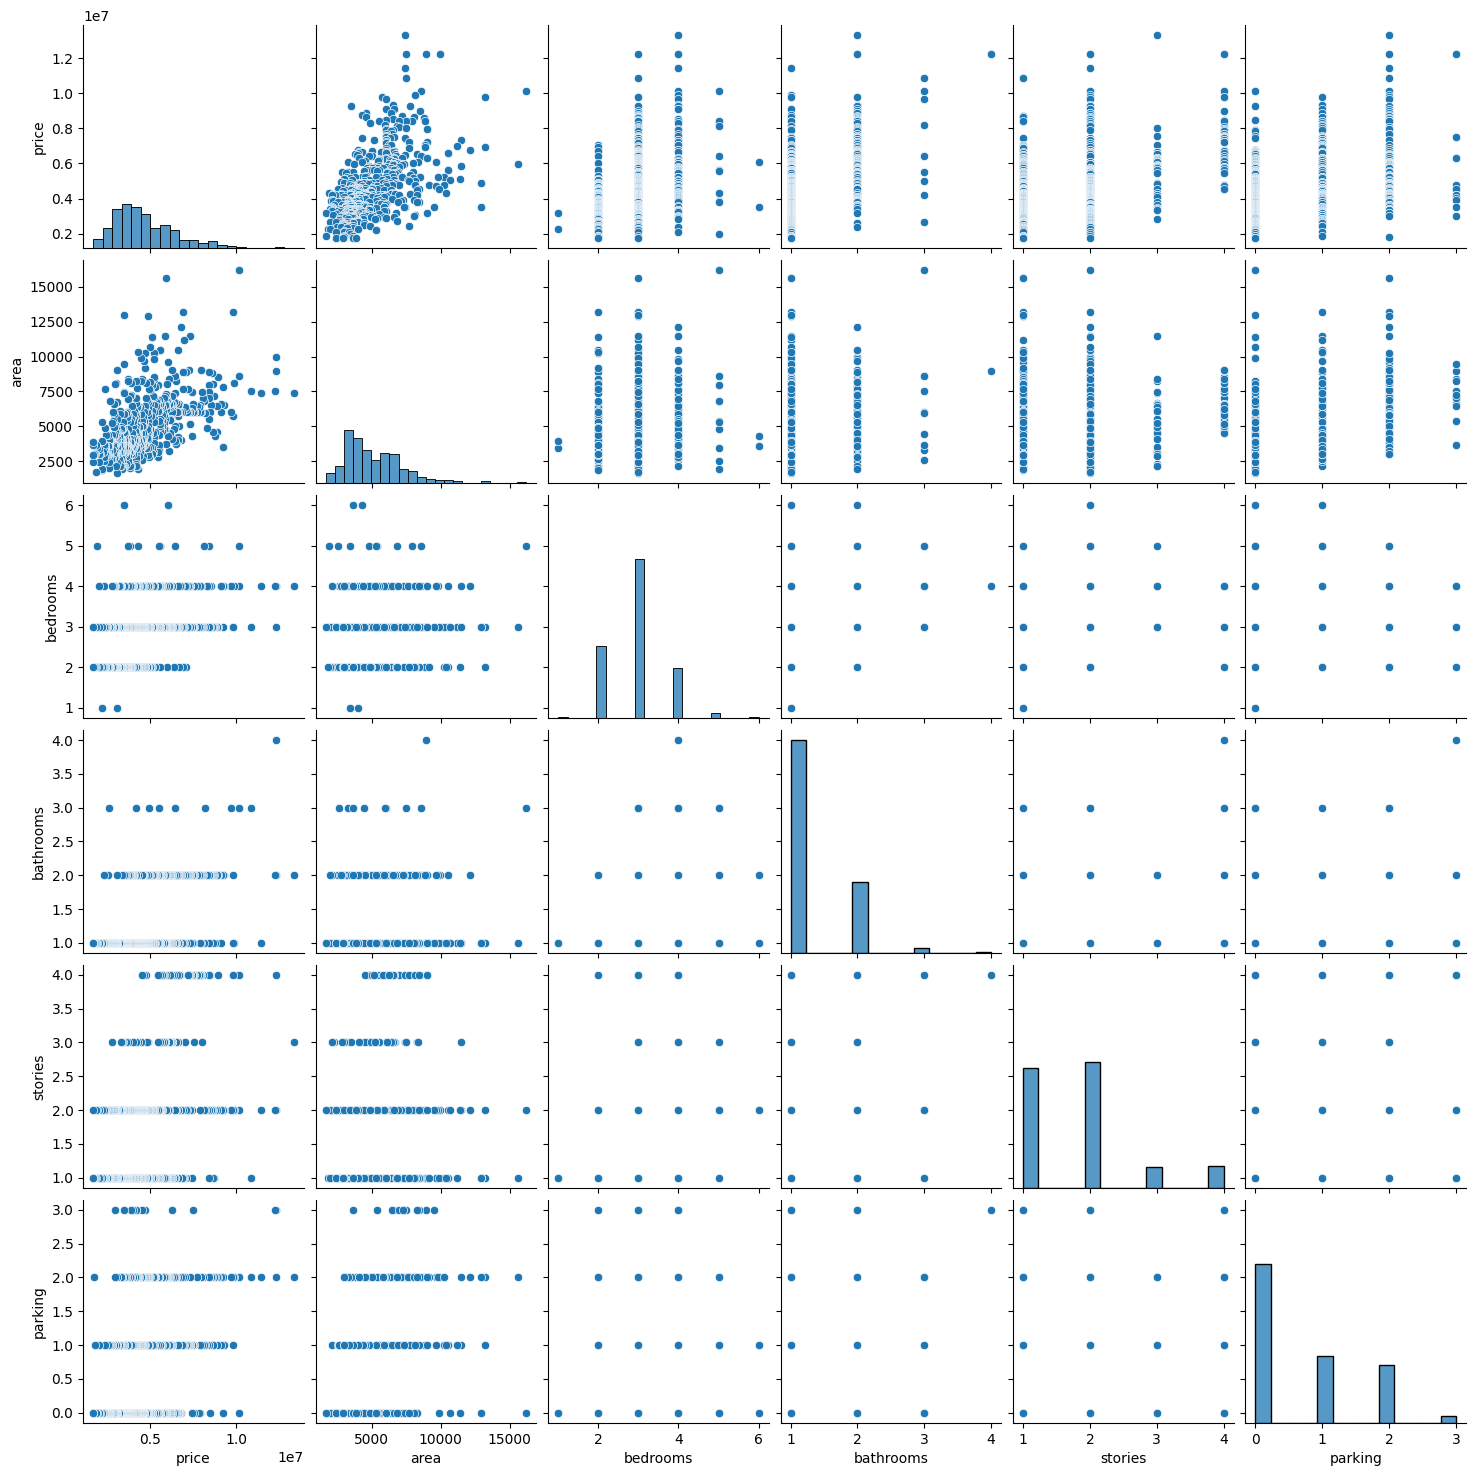

In [15]:
sns.pairplot(dataset)
plt.show()

Model Data

In [16]:
import pandas as pd
import numpy as np


np.set_printoptions(precision=3, suppress=True)

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print(tf.__version__)

2.10.1


In [17]:
#Review null records
dataset.isna().sum()


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
#And drop null records
dataset = dataset.dropna()

In [19]:
#Dummify categorical features
dataset_dummydf = pd.get_dummies(dataset, columns=categorical_features, prefix=categorical_features, prefix_sep='_')
dataset_dummydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545 entries, 0 to 544
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   price                            545 non-null    int64
 1   area                             545 non-null    int64
 2   bedrooms                         545 non-null    int64
 3   bathrooms                        545 non-null    int64
 4   stories                          545 non-null    int64
 5   parking                          545 non-null    int64
 6   mainroad_no                      545 non-null    uint8
 7   mainroad_yes                     545 non-null    uint8
 8   guestroom_no                     545 non-null    uint8
 9   guestroom_yes                    545 non-null    uint8
 10  basement_no                      545 non-null    uint8
 11  basement_yes                     545 non-null    uint8
 12  hotwaterheating_no               545 non-null    u

In [20]:
#Create a training and test datasets that are exclusive of eachother
train_dataset = dataset_dummydf.sample(frac=0.8, random_state=0)
test_dataset = dataset_dummydf.drop(train_dataset.index)

In [21]:
#Create training and test feature dataframes
train_features = train_dataset.copy()
test_features = test_dataset.copy()

#Remove the label feature from the feature dataframes 
train_labels = train_features.pop(label_feature)
test_labels = test_features.pop(label_feature)

model_features = train_features.columns.tolist()

Build Layers & Model

In [22]:
#The continious features have different scales and ranges. This can cause issues with training/optimising the model
#With some features being dominated and others dominating
train_dataset[continious_features].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
area,436.0000,"5,190.0046","2,229.1905","1,650.0000","3,580.5000","4,636.0000","6,420.0000","16,200.0000"
bedrooms,436.0000,2.9633,0.7388,1.0000,2.0000,3.0000,3.0000,6.0000
bathrooms,436.0000,1.2936,0.5173,1.0000,1.0000,1.0000,2.0000,4.0000
stories,436.0000,1.7936,0.8461,1.0000,1.0000,2.0000,2.0000,4.0000
parking,436.0000,0.6560,0.8474,0.0000,0.0000,0.0000,1.0000,3.0000


In [23]:
#Normalization of data is a simple best practice to manage the issues related to variables of different scales
#The step below defines and create a normalization layer
normalizer = tf.keras.layers.Normalization(axis=-1)

In [24]:
#Then run the dataset of input features through the normalizer layer to determine the normalization statistics.... mean and variance
#https://www.tensorflow.org/api_docs/python/tf/keras/layers/Normalization#adapt
normalizer.adapt(np.array(train_features))

Normalization of Inputs

In [25]:
#View the train_features feature means returned as an array
normalizer.mean.numpy()

array([[5190.005,    2.963,    1.294,    1.794,    0.656,    0.14 ,
           0.86 ,    0.814,    0.186,    0.649,    0.351,    0.956,
           0.044,    0.7  ,    0.3  ,    0.768,    0.232,    0.264,
           0.408,    0.328]], dtype=float32)

In [26]:
#Return the raw first row of the continious features of the train_features dataset
first = np.array(train_features[:1])

#Run the first row through the normalizer layer to normalize it  - produce the normalized output
#Comparing this output to above shows how the values have been normalized
normalrow = normalizer(first).numpy()

In [27]:
first

array([[4000,    3,    1,    2,    1,    0,    1,    1,    0,    1,    0,
           1,    0,    1,    0,    1,    0,    1,    0,    0]],
      dtype=int64)

In [28]:
normalrow

array([[-0.534,  0.05 , -0.568,  0.244,  0.406, -0.403,  0.403,  0.478,
        -0.478,  0.735, -0.735,  0.213, -0.213,  0.655, -0.655,  0.549,
        -0.549,  1.671, -0.831, -0.699]], dtype=float32)

In [29]:
normalrow = normalrow[:,:5]
compare = train_features[continious_features].iloc[:1].copy()
compare = compare.append(pd.DataFrame(normalrow, columns=continious_features), ignore_index=True)
compare

,area,bedrooms,bathrooms,stories,parking
0,"4,000.0000",3.0000,1.0000,2.0000,1.0000
1,-0.5344,0.0497,-0.5681,0.2442,0.4064


Define Linear Model & Layers

In [30]:
#This is the actual model.... it has a normalization layer and one dense layer of a single neuron connected to each neuron of the input layer
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])

In [31]:
#Run first 10 data points of train_features dataset through the model
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 66ms/step


array([[ 1.583],
       [ 0.5  ],
       [-1.342],
       [-1.089],
       [ 1.301],
       [ 0.952],
       [-1.029],
       [ 0.129],
       [-1.247],
       [ 0.387]], dtype=float32)

Review Model

In [32]:
#cheaking the model weights/coefficients of the model
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(20, 1) dtype=float32, numpy=
array([[-0.471],
       [ 0.434],
       [ 0.452],
       [ 0.349],
       [-0.349],
       [ 0.033],
       [-0.128],
       [-0.496],
       [-0.426],
       [-0.197],
       [ 0.303],
       [-0.285],
       [-0.442],
       [ 0.516],
       [-0.408],
       [ 0.338],
       [ 0.29 ],
       [ 0.485],
       [-0.455],
       [-0.336]], dtype=float32)>

In [33]:
Coefficients = np.array(linear_model.layers[1].kernel)
#Coefficients = [element for sublist in Coefficients for element in sublist]
Coefficients = Coefficients.flatten().tolist()

Coefficientdf = pd.DataFrame(columns = model_features)
Coefficientdf.loc[len(Coefficientdf)] = Coefficients

Coefficientdf

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,-0.4713,0.4341,0.4521,0.3492,-0.3495,0.0329,-0.1276,-0.4958,-0.4259,-0.1970,0.3028,-0.2847,-0.4419,0.5158,-0.4076,0.3380,0.2898,0.4851,-0.4550,-0.3364


Train & Optimise Model

In [34]:
linear_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=6000),
    loss='mean_absolute_error')

In [35]:
%%time
history = linear_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 3.49 s


In [36]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  #plt.xlim([0, 10])
  #plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [' + label_feature + ']')
  plt.legend()
  plt.grid(True)

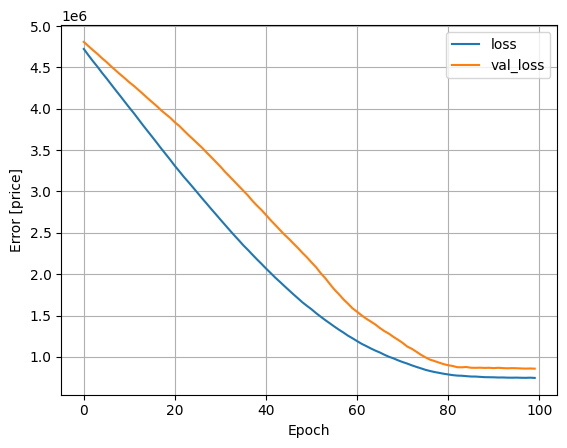

In [37]:
plot_loss(history)

In [38]:
test_results = {}

test_results['linear_model'] = linear_model.evaluate(
    test_features, test_labels, verbose=0)

Evaluate Model

In [39]:
#cheaking the model weights/coefficients of the model
linear_model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(20, 1) dtype=float32, numpy=
array([[ 590597.9  ],
       [  -2351.805],
       [ 456083.3  ],
       [ 358787.   ],
       [ 207819.98 ],
       [ -32042.41 ],
       [  32041.883],
       [ -63164.7  ],
       [  63161.51 ],
       [-101668.08 ],
       [ 101666.88 ],
       [ -25852.197],
       [  25851.018],
       [-203851.3  ],
       [ 203845.8  ],
       [-119986.49 ],
       [ 119992.72 ],
       [  28477.074],
       [  50188.406],
       [-102688.8  ]], dtype=float32)>

In [40]:
Coefficients = np.array(linear_model.layers[1].kernel)
#Coefficients = [element for sublist in Coefficients for element in sublist]
Coefficients = Coefficients.flatten().tolist()

Coefficientdf = pd.DataFrame(columns = model_features)
Coefficientdf.loc[len(Coefficientdf)] = Coefficients

Coefficientdf

,area,bedrooms,bathrooms,stories,parking,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,"590,597.8750","-2,351.8054","456,083.3125","358,787.0000","207,819.9844","-32,042.4102","32,041.8828","-63,164.6992","63,161.5117","-101,668.0781","101,666.8828","-25,852.1973","25,851.0176","-203,851.2969","203,845.7969","-119,986.4922","119,992.7188","28,477.0742","50,188.4062","-102,688.7969"


In [41]:
#Run first 10 data points of train_features dataset through the model
linear_model.predict(train_features[:10])

1/1 [==============================] - 0s 44ms/step


array([[3661031. ],
       [5967555. ],
       [4195866. ],
       [6359228. ],
       [2854055.8],
       [6560060. ],
       [3158881.2],
       [3375854.5],
       [3395723.8],
       [7850518.5]], dtype=float32)

In [42]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"


4/4 [==============================] - 0s 1ms/step


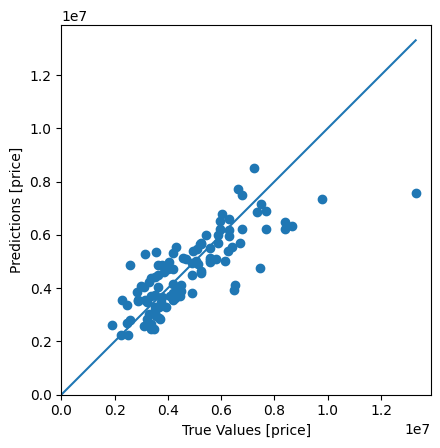

In [43]:
test_predictions = linear_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)

1st DNN Model - Wide 20/64/64/1

In [44]:
dnn_model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
  ])

dnn_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


Train & Optimize DNN Model

In [45]:
%%time
history = dnn_model.fit(
    train_features,
    train_labels,
    epochs=2000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 1min 5s


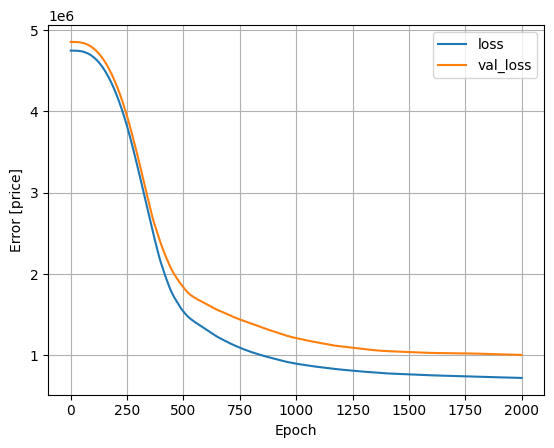

In [46]:
plot_loss(history)

In [47]:
test_results['dnn_model'] = dnn_model.evaluate(
    test_features, test_labels, verbose=0)

4/4 [==============================] - 0s 997us/step


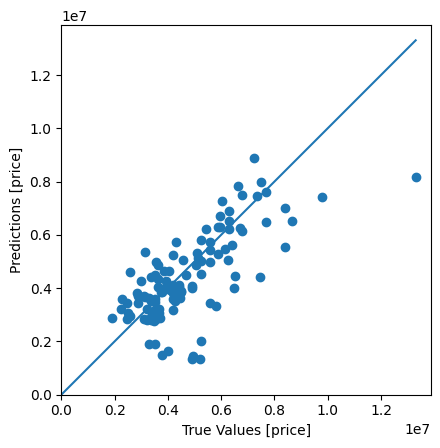

In [48]:
test_predictions = dnn_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)


In [49]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"
dnn_model,"963,492.0625"


2nd DNN Model - 20/40/1

In [50]:
dnn2_model = keras.Sequential([
      normalizer,
      layers.Dense(40, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

dnn2_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [51]:
%%time
history = dnn2_model.fit(
    train_features,
    train_labels,
    epochs=2000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 1min 8s


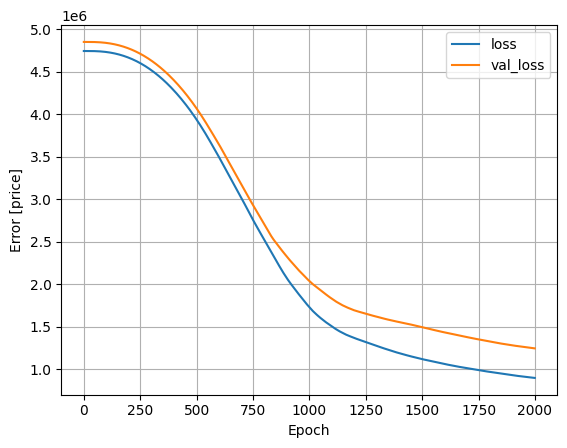

In [52]:
plot_loss(history)

In [53]:
test_results['dnn2_model'] = dnn2_model.evaluate(
    test_features, test_labels, verbose=0)

4/4 [==============================] - 0s 919us/step


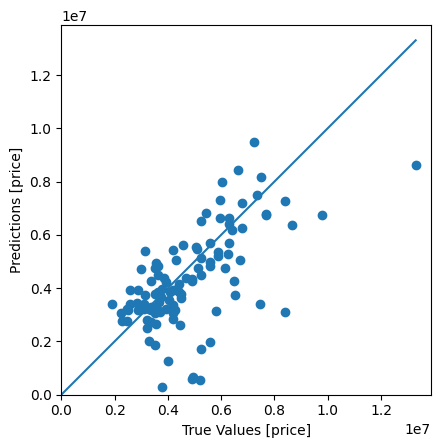

In [54]:
test_predictions = dnn2_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)


In [55]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"
dnn_model,"963,492.0625"
dnn2_model,"1,136,293.6250"


3rd DNN Model - Deep 20/20/20/20/20/20/1

In [56]:
#https://machinelearningmastery.com/how-to-configure-the-number-of-layers-and-nodes-in-a-neural-network/

#States that "empirically, on problems of interest, deep neural networks appear to perform better"

In [57]:
dnn3_model = keras.Sequential([
      normalizer,
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

dnn3_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))


In [58]:
%%time
history = dnn3_model.fit(
    train_features,
    train_labels,
    epochs=2000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 1min 9s


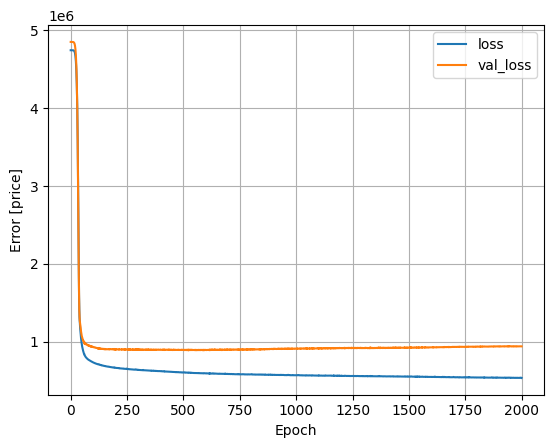

In [59]:
plot_loss(history)

4/4 [==============================] - 0s 997us/step


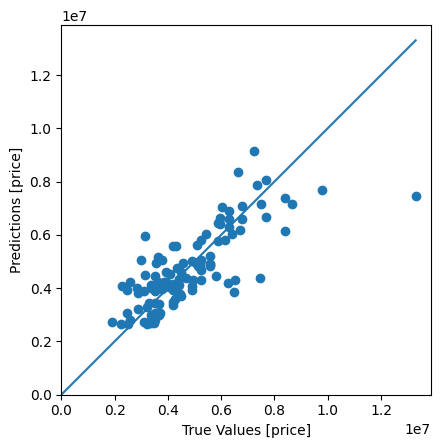

In [60]:
test_results['dnn3_model'] = dnn3_model.evaluate(
    test_features, test_labels, verbose=0)

test_predictions = dnn3_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)

In [61]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"
dnn_model,"963,492.0625"
dnn2_model,"1,136,293.6250"
dnn3_model,"797,774.3125"


4th DNN

In [62]:
dnn4_model = keras.Sequential([
      normalizer,
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(20, activation='relu'),
      layers.Dense(1)
  ])

dnn4_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [63]:
%%time
history = dnn4_model.fit(
    train_features,
    train_labels,
    epochs=100,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 4.65 s


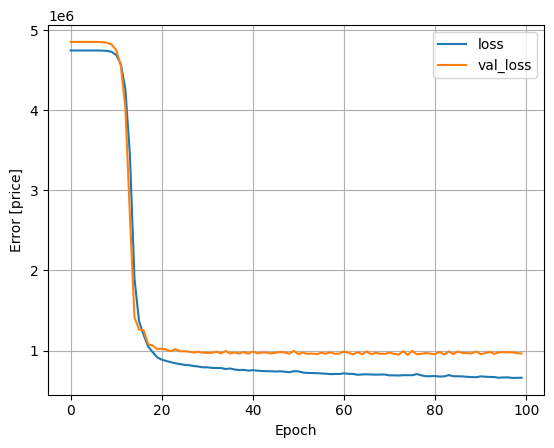

In [64]:
plot_loss(history)

4/4 [==============================] - 0s 998us/step


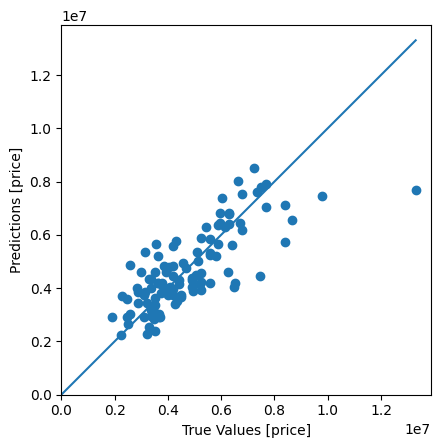

In [65]:
test_results['dnn4_model'] = dnn4_model.evaluate(
    test_features, test_labels, verbose=0)

test_predictions = dnn4_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)

In [66]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"
dnn_model,"963,492.0625"
dnn2_model,"1,136,293.6250"
dnn3_model,"797,774.3125"
dnn4_model,"841,746.0000"


5th DNN Model

In [67]:
dnn5_model = keras.Sequential([
      normalizer,
      layers.Dense(3, activation='relu'),
      layers.Dense(2, activation='relu'),
      layers.Dense(2, activation='relu'),
      layers.Dense(1)
  ])

dnn5_model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))

In [68]:
%%time
history = dnn5_model.fit(
    train_features,
    train_labels,
    epochs=2000,
    # Suppress logging.
    verbose=0,
    # Calculate validation results on 20% of the training data.
    validation_split = 0.2)

Wall time: 1min 9s


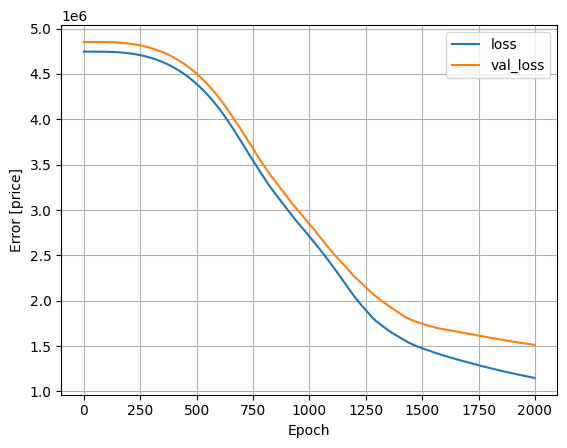

In [69]:
plot_loss(history)

4/4 [==============================] - 0s 1ms/step


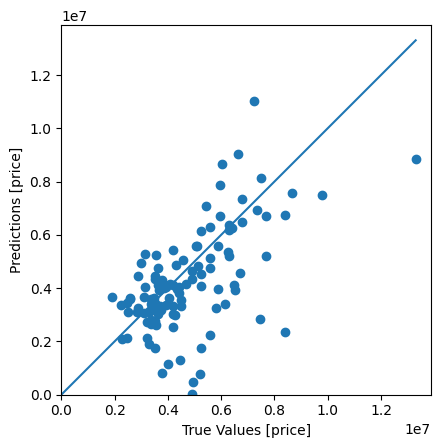

In [70]:
test_results['dnn5_model'] = dnn5_model.evaluate(
    test_features, test_labels, verbose=0)

test_predictions = dnn5_model.predict(test_features).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values ['+label_feature+']')
plt.ylabel('Predictions ['+label_feature+']')
plt.xlim(0,)
plt.ylim(plt.xlim())

x = range(0, max(test_labels))
y = x

bestfitline = plt.plot(x, y)

In [71]:
#Review performance of model(s)

pd.DataFrame(test_results, index=['Mean absolute error ['+label_feature+']']).T

,Mean absolute error [price]
linear_model,"797,502.8750"
dnn_model,"963,492.0625"
dnn2_model,"1,136,293.6250"
dnn3_model,"797,774.3125"
dnn4_model,"841,746.0000"
dnn5_model,"1,248,926.3750"
